In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# a^c = b implies log_a(b) = c
def generate_data(num_samples=10000):
    a = np.random.uniform(1.1, 10, num_samples)
    c = np.random.uniform(1, 5, num_samples)
    b = a ** c
    return a, b, c


a, b, c = generate_data()
X = np.column_stack((a, b))
y = c


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.Input(shape=(2,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7903.6582 - val_loss: 6821.1558
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4129.5322 - val_loss: 6.8005
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.9060 - val_loss: 5.5335
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8578 - val_loss: 4.7945
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5763 - val_loss: 3.5885
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0390 - val_loss: 2.6934
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0490 - val_loss: 6.1295
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2611 - val_loss: 1.2915
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.1350 - val_loss: 1.4698
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1528 - val_loss: 0.8285
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5134 - val_loss: 23.1212
Epoch 12/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 

In [5]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")

# PVerify
a_test = 4
b_test = 64  #log base 4 of 64 = 3
predicted_c = model.predict(np.array([[a_test, b_test]]))
print(f"Predicted log base {a_test} of {b_test} is approximately {predicted_c[0][0]}")

a = 4
b = 64
c = math.log(b, a)  # log base 4 of 64


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5527
Test loss: 0.5089025497436523
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted log base 4 of 64 is approximately 3.4331202507019043


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


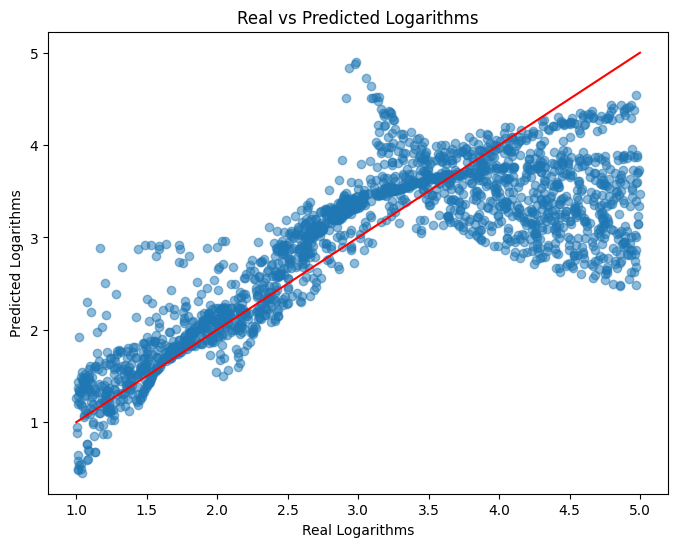

In [7]:
import matplotlib.pyplot as plt;

plt.figure(figsize=(8, 6))
plt.scatter(y_test, model.predict(X_test).flatten(), alpha=0.5)
plt.xlabel('Real Logarithms')
plt.ylabel('Predicted Logarithms')
plt.title('Real vs Predicted Logarithms')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ideal line
plt.show()